# Classification with Logistic Regression

In [30]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import(
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
%matplotlib inline


In [3]:
# loading the dataset
df = pd.read_csv("iris.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


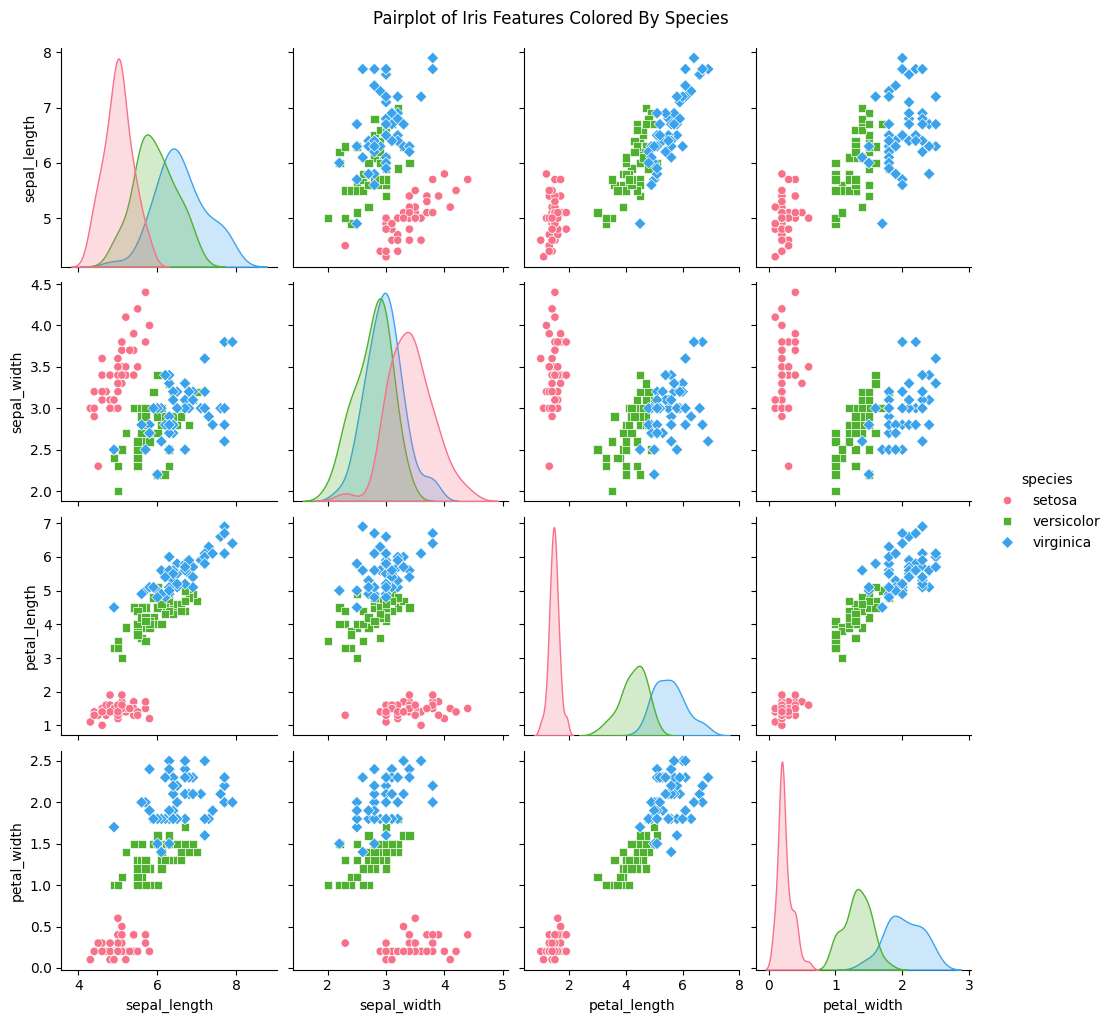

In [25]:
# Pairplot of the Dataset
sns.pairplot(df, hue='species', markers=['o','s','D'], palette='husl')
plt.suptitle("Pairplot of Iris Features Colored By Species", y=1.02)
plt.show()

In [4]:
# Inspecting Info and Summary
print("Dataset Info: ")
print(df.info())
print("\n Dataset Description:")
print(df.describe())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

 Dataset Description:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000 

# Splitting Features (X) and Targets (y)

In [15]:
# Features (X)
X = df.drop(columns="species", axis=1)

# Target (y)
y = df.species

# extracting class name
class_names = sorted(y.unique())

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\n First few features:") 
print(X.head())
print("\n Target Values:")
print(y.head())

Shape of X: (150, 4)
Shape of y: (150,)

 First few features:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

 Target Values:
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [16]:
# Splitting into train/test (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y) 

# Preprocessing: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Training using Logistic Regression(One vs Rest)
lr = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)



c:\Users\Ularam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'ovr'


In [18]:
# Predictions
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)
 
# Evaluation for Logistic Regression
print("\n ===== Logistic Regression (One-vs-Rest) Results =====")
print(f"Accuracy: {accuracy_score(y_test,y_pred_lr):.4f}")
print("\n Classification Report")
print(classification_report(y_test, y_pred_lr, target_names=class_names))

print(f"Macro Precision: {precision_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"Macro F1-Score: {f1_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"ROC AUC (macro average):{roc_auc_score(y_test,y_prob_lr, multi_class='ovr', average='macro'):.4f}")

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))



 ===== Logistic Regression (One-vs-Rest) Results =====
Accuracy: 0.9000

 Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Macro Precision: 0.9024
Macro Recall: 0.9000
Macro F1-Score: 0.8997
ROC AUC (macro average):0.9850

 Confusion Matrix:
[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]


# Comparing with other Classifiers like RF & SVM

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

# SVM (Linear Kernel, with scaling)
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Result
print("\n ==== Model Comparison (Accuracy) ====")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"SVM (Linear): {accuracy_score(y_test, y_pred_svm):.4f}")



 ==== Model Comparison (Accuracy) ====
Logistic Regression: 0.9000
Random Forest: 0.9000
SVM (Linear): 1.0000


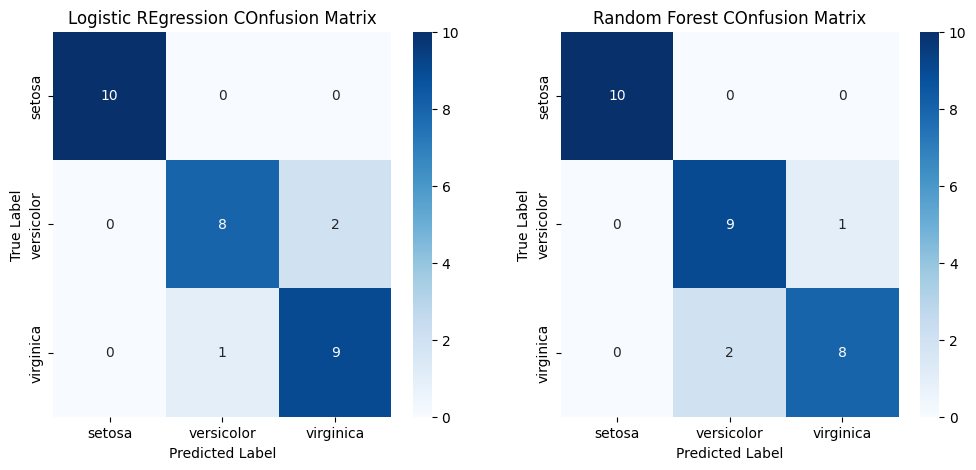

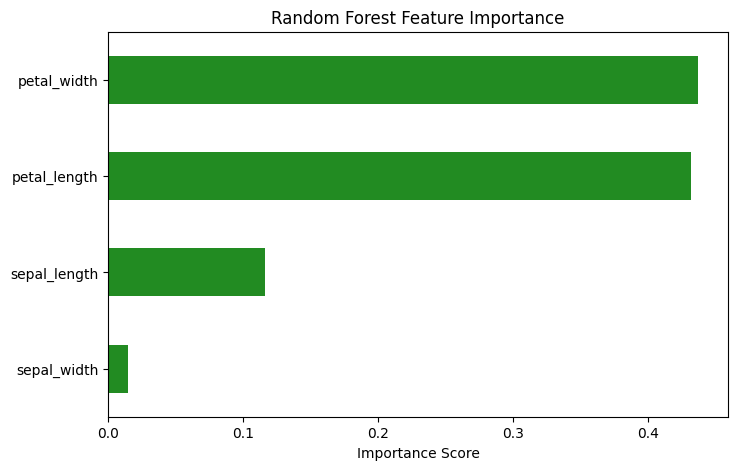

In [26]:
# Confusion Matrix Heatmap
fig, axes = plt.subplots(1,2, figsize=(12,5))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=class_names)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, ax = axes[0])
axes[0].set_title("Logistic REgression COnfusion Matrix")
axes[0].set_ylabel("True Label")
axes[0].set_xlabel("Predicted Label")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=class_names)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, ax = axes[1])
axes[1].set_title("Random Forest COnfusion Matrix")
axes[1].set_ylabel("True Label")
axes[1].set_xlabel("Predicted Label")

# Feature importance bar (For Random Forest)
# To show which features Random Forest used the most
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index = X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh', color='forestgreen')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

# Decision Tree Classifier

In [29]:
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
dt.fit(X_train, y_train)

# Quick Prediction and Evaluation 
y_pred = dt.predict(X_test)

print("\n Accuracy", round(accuracy_score(y_test, y_pred),4))
print("\n Classification Report: \n")
print(classification_report(y_test, y_pred))


 Accuracy 0.9333

 Classification Report: 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Visualizing the Tree

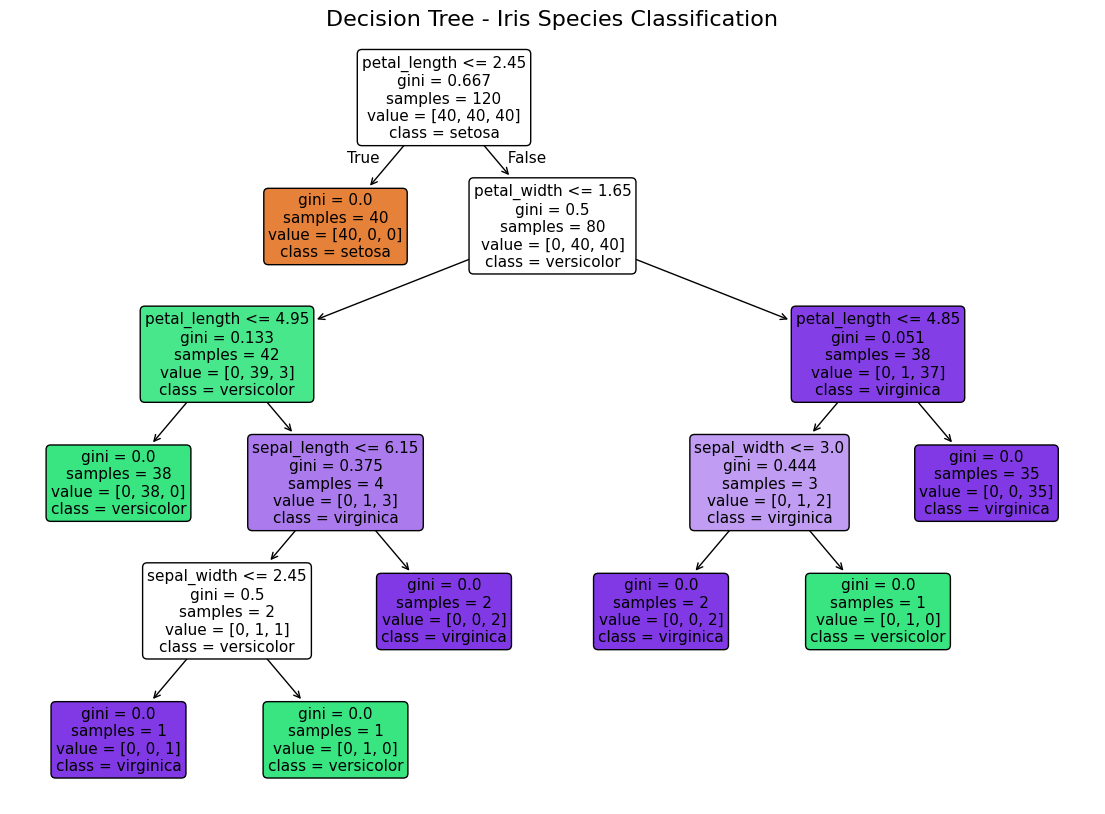

In [31]:
plt.figure(figsize=(14,10))

tree.plot_tree(
    
    dt,
    feature_names=X.columns,
    class_names=sorted(y.unique()),
    filled=True,
    rounded = True,
    fontsize =11,
    impurity=True
)

plt.title("Decision Tree - Iris Species Classification", fontsize =16)
plt.show()

In [33]:
# Comparison Table 
results = pd.DataFrame(
    {
        "Model":['Logistic Regression', 'Random Forest', 'Decision Tree'],
        'Accuracy': [0.9333, 1.0000, accuracy_score(y_test, y_pred)]        
    }
).round(4)
print(results)

                 Model  Accuracy
0  Logistic Regression    0.9333
1        Random Forest    1.0000
2        Decision Tree    0.9333
